In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot

import warnings
warnings.filterwarnings('ignore')

plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)
plt.rc('axes', labelsize = 16, labelpad = 20)

In [2]:
df = pd.read_csv(
    'insurance.csv'
)
for col in ['region', 'sex', 'children', 'smoker']:
    df[col] = df[col].astype('category')

Looking at interactions between Age and Smoker

In [34]:
reg_1  = smf.ols(formula = 'charges ~ age + C(smoker)', data = df)
reg_2 = smf.ols(formula = 'charges ~ age * C(smoker)', data = df)

fit_1 = reg_1.fit()
fit_2 = reg_2.fit()

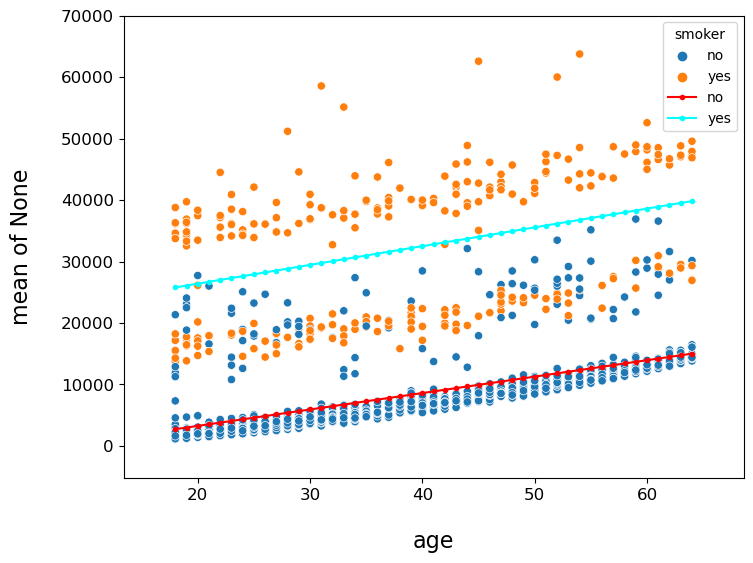

In [39]:
fig = plt.figure(figsize = (8,6))
gs = fig.add_gridspec(1,1)
ax = [None]
ax[0] = fig.add_subplot(gs[0,0])

sns.scatterplot(
    x  = df['age'],
    y = df['charges'],
    hue = df['smoker'],
    ax = ax[0]
)

interaction_plot(df['age'], df['smoker'], fit_2.fittedvalues, ax = ax[0])

plt.show()


Because our lines are relatively parallel between the smokers and non smokers it suggests that there is no interaction between age and smoker in our dataset

In [37]:
reg_3  = smf.ols(formula = 'charges ~ bmi + C(smoker)', data = df)
reg_4 = smf.ols(formula = 'charges ~ bmi * C(smoker)', data = df)

fit_3 = reg_3.fit()
fit_4 = reg_4.fit()

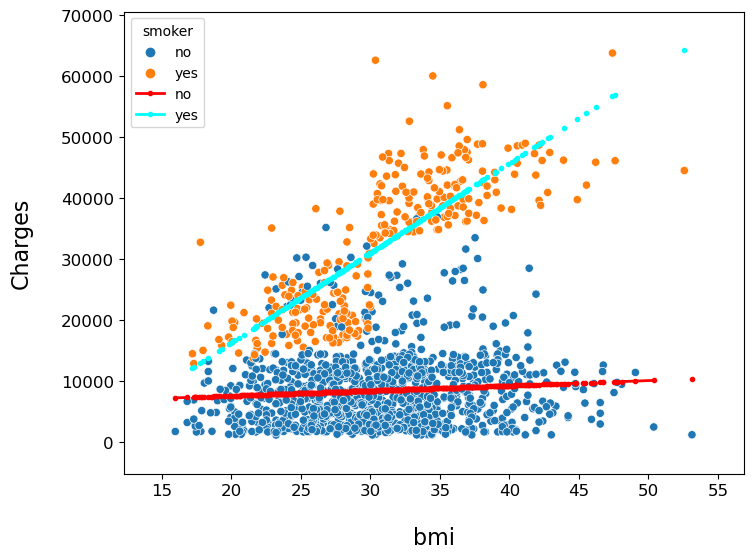

In [45]:
fig = plt.figure(figsize = (8,6))
gs = fig.add_gridspec(1,1)
ax = [None]
ax[0] = fig.add_subplot(gs[0,0])

sns.scatterplot(
    x  = df['bmi'],
    y = df['charges'],
    hue = df['smoker'],
    ax = ax[0]
)

interaction_plot(df['bmi'], df['smoker'], fit_4.fittedvalues, ax = ax[0], plottype='b', linewidth = 2)

ax[0].set_ylabel('Charges')

plt.show()

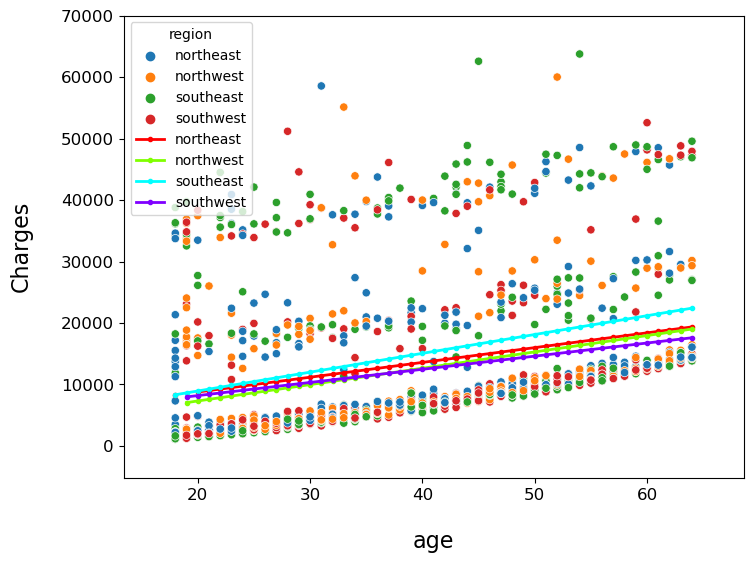

In [112]:
reg_5  = smf.ols(formula = 'charges ~ age * C(region)', data = df)
fit_5= reg_5.fit()

fig = plt.figure(figsize = (8,6))
gs = fig.add_gridspec(1,1)
ax = [None]
ax[0] = fig.add_subplot(gs[0,0])

sns.scatterplot(
    x  = df['age'],
    y = df['charges'],
    hue = df['region'],
    ax = ax[0]
)

interaction_plot(df['age'], df['region'], fit_5.fittedvalues, ax = ax[0], plottype='b', linewidth = 2)

ax[0].set_ylabel('Charges')

plt.show()

In [108]:
fit_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.504
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           3.23e-10
Time:                        11:52:13   Log-Likelihood:                -14448.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1330   BIC:                         2.895e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    591.6542   3313.953      0.179      0.858   -5909.490    7092.798
C(region)[T.northwest]       429.2049   5048.715      0.085      0.932   -9475.108    1.03e+04
C(region)[T.southeast]      3856.3484   4655.921      0.828      0.408   -5277.401     1.3e+04
C(region)[T.southwest]     -2094.3274   4899.121     -0.427      0.669   -1.17e+04    7516.520
bmi                          439.2592    111.319      3.946      0.000     220.878     657.640
bmi:C(region)[T.northwest]   -48.9578    169.993     -0.288      0.773    -382.441     284.525
bmi:C(region)[T.southeast]  -130.8466    147.161     -0.889      0.374    -419.539     157.846
bmi:C(region)[T.southwest]    13.3925    160.733      0.083      0.934    -301.926     328.711
==============================================================================
Omnibus:                      262.392   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.848
Skew:                           1.299   Prob(JB):                     3.75e-95
Kurtosis:                       4.027   Cond. No.                         784.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can observe that there is clearly some interaction between bmi and smoker on the value of our charges, we will want to include this interaction term in our linear model

### Building the Linear Model

In [150]:
model = smf.ols(formula = 'charges ~ age + I(bmi**0.436) * C(smoker) + C(children) + C(smoker) + C(region)', data = df).fit()
model_2 = smf.ols(formula = 'charges ~ age + bmi * C(smoker) + C(children) + C(smoker)+ C(region)', data = df).fit()

In [151]:
print('model 1:', model.rsquared)
print('model 2:', model_2.rsquared)

model 1: 0.8421720276609326
model 2: 0.8413795612379806


In [68]:
model_3 = smf.ols(formula = 'charges ~ age * C(smoker) + (bmi * C(smoker)) + C(children) + C(smoker) + C(region) + C(sex)', data = df).fit()

In [72]:
print('model 3:', model_3.rsquared)

model 3: 0.8418009476801138


We can see that including the interaction terms bmi and smoker increase our R-squared value but including the age smoker interaction does not (we identified that there isn't an interaction above so this makes sense)

In [106]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     469.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:51:53   Log-Likelihood:                -13244.
No. Observations:                1338   AIC:                         2.652e+04
Df Residuals:                    1322   BIC:                         2.660e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1399.9994   1080.368     -1.296      0.195   -3519.422     719.423
C(region)[T.northwest]     -1261.8343   1130.696     -1.116      0.265   -3479.988     956.320
C(region)[T.southeast]     -3067.7744   1104.066     -2.779      0.006   -5233.686    -901.863
C(region)[T.southwest]     -2704.0145   1137.156     -2.378      0.018   -4934.842    -473.187
C(smoker)[T.yes]           -2.038e+04   1647.379    -12.372      0.000   -2.36e+04   -1.72e+04
C(children)[T.1]             317.5165    336.879      0.943      0.346    -343.360     978.393
C(children)[T.2]            1522.0088    373.138      4.079      0.000     790.001    2254.017
C(children)[T.3]             981.5300    438.474      2.239      0.025     121.349    1841.711
C(children)[T.4]            3359.5386    991.362      3.389      0.001    1414.725    5304.352
C(children)[T.5]            1781.3295   1165.688      1.528      0.127    -505.470    4068.129
age                          238.4407     19.235     12.396      0.000     200.706     276.175
age:C(region)[T.northwest]    16.9484     27.127      0.625      0.532     -36.268      70.165
age:C(region)[T.southeast]    47.5061     26.342      1.803      0.072      -4.172      99.184
age:C(region)[T.southwest]    37.5507     27.209      1.380      0.168     -15.827      90.929
bmi                           21.4991     25.653      0.838      0.402     -28.826      71.825
bmi:C(smoker)[T.yes]        1440.4073     52.598     27.385      0.000    1337.222    1543.593
==============================================================================
Omnibus:                      710.495   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4285.478
Skew:                           2.491   Prob(JB):                         0.00
Kurtosis:                      10.215   Cond. No.                         762.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""